# Hoja de trabajo 7: modelos de regresión logística
Integrantes: 
- Francis Aguilar #22243
- Angela Garcia #22869  

Enlace de repositorio: https://github.com/angelargd8/HTD8-MDD 

In [43]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
#cargar los datos
df_train = pd.read_csv("train.csv")

### Variables que no se tomarán en cuenta por falta de datos
No se tomarán en cuenta las siguiente variables porque tienen demasiados datos faltantes, según las respuestas anteriores, estar variables no nos serán de utilidad.   
Demasiados datos faltantes, irrelevante para el análisis   
- **Alley** 91 non-null / 1460 registros 
- **MasVnrType** 588 non-null / 1460
- **FireplaceQu** 770 non-null / 1460
- **PoolQC** 7 non-null / 1460
- **Fence** 281 non-null / 1460    
- **MiscFeature** 54 non-null / 1460

In [44]:
print(df_train.shape)
# Eliminar las columnas 
columnas_a_eliminar = ['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']  # Reemplaza con los nombres de las columnas que deseas eliminar
df_train = df_train.drop(columns=columnas_a_eliminar)
print(df_train.shape)
print("Se eliminaron un total de 6 columnas")

(1460, 81)
(1460, 75)
Se eliminaron un total de 6 columnas


### 1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo. 

In [45]:
#calcular percentiles 33 y 66 %%
import seaborn as sns

df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

low = df_train['SalePrice'].quantile(0.33)

medium = df_train['SalePrice'].quantile(0.66)

high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

print(df_train['SalePrice_Class'].value_counts())


SalePrice_Class
High            497
Economic        483
Intermediate    480
Name: count, dtype: int64


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

df_train = df_train.loc[df_numerico.index]
variables_numericas = df_numerico.select_dtypes(include=[np.number]).columns.tolist()
print("Variables numéricas:", variables_numericas)

X = df_numerico[variables_numericas].drop(columns=['SalePrice', 'SalePrice_Class', ''], errors='ignore')
y = df_train['SalePrice_Class']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)

Variables numéricas: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Shape of X: (1121, 37)
Shape of y: (1121,)
Shape of X_train: (896, 37)


### 2. Explore los datos y explique las transformaciones que debe hacerle para generar un modelo de máquinas vectoriales de soporte. 

#### exploración de datos

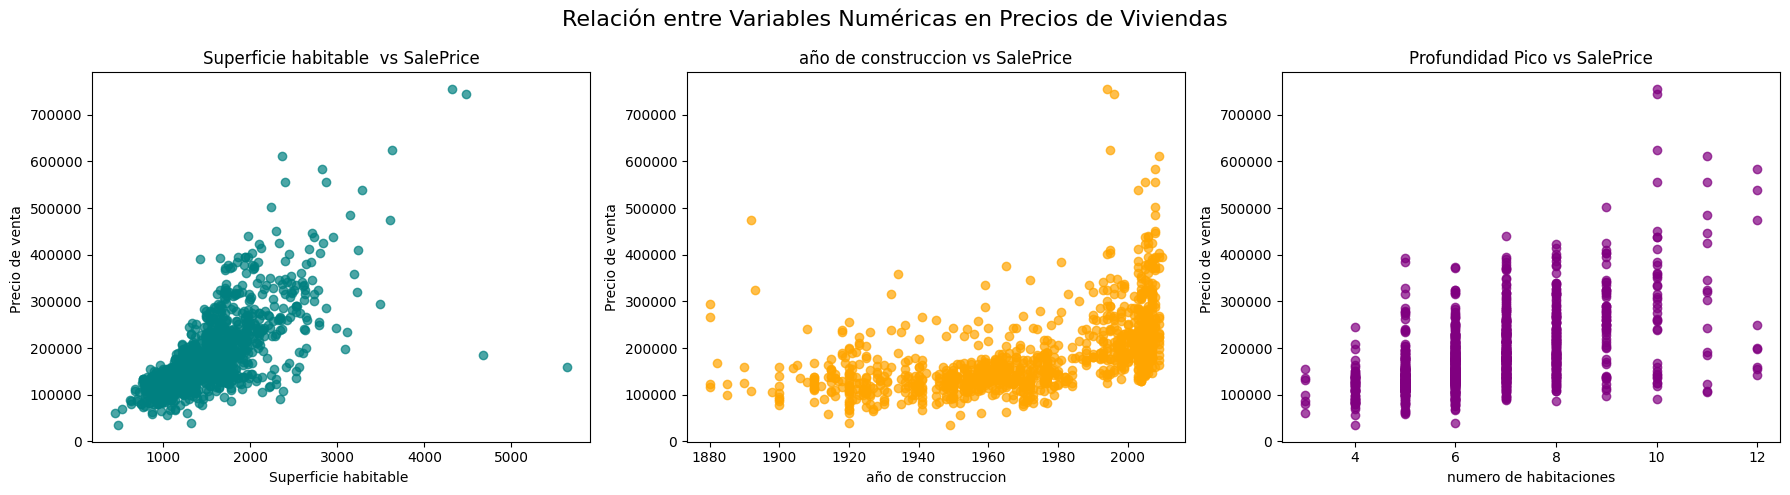

In [47]:
# Exploración básica
# Crear figura y subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relación entre Variables Numéricas en Precios de Viviendas', fontsize=16)

# Gráfico 1: GrLivArea vs SalePrice
axs[0].scatter(df_numerico['GrLivArea'], df_numerico['SalePrice'], c='teal', alpha=0.7)
axs[0].set_xlabel('Superficie habitable ')
axs[0].set_ylabel('Precio de venta ')
axs[0].set_title('Superficie habitable  vs SalePrice')

# Gráfico 2: YearBuilt vs SalePrice
axs[1].scatter(df_numerico['YearBuilt'], df_numerico['SalePrice'], c='orange', alpha=0.7)
axs[1].set_xlabel('año de construccion')
axs[1].set_ylabel('Precio de venta')
axs[1].set_title('año de construccion vs SalePrice')

# Gráfico 3: TotRmsAbvGrd pico vs SalePrice
axs[2].scatter(df_numerico['TotRmsAbvGrd'], df_numerico['SalePrice'], c='purple', alpha=0.7)
axs[2].set_xlabel('numero de habitaciones')
axs[2].set_ylabel('Precio de venta ')
axs[2].set_title('Profundidad Pico vs SalePrice')

plt.tight_layout()
plt.show()

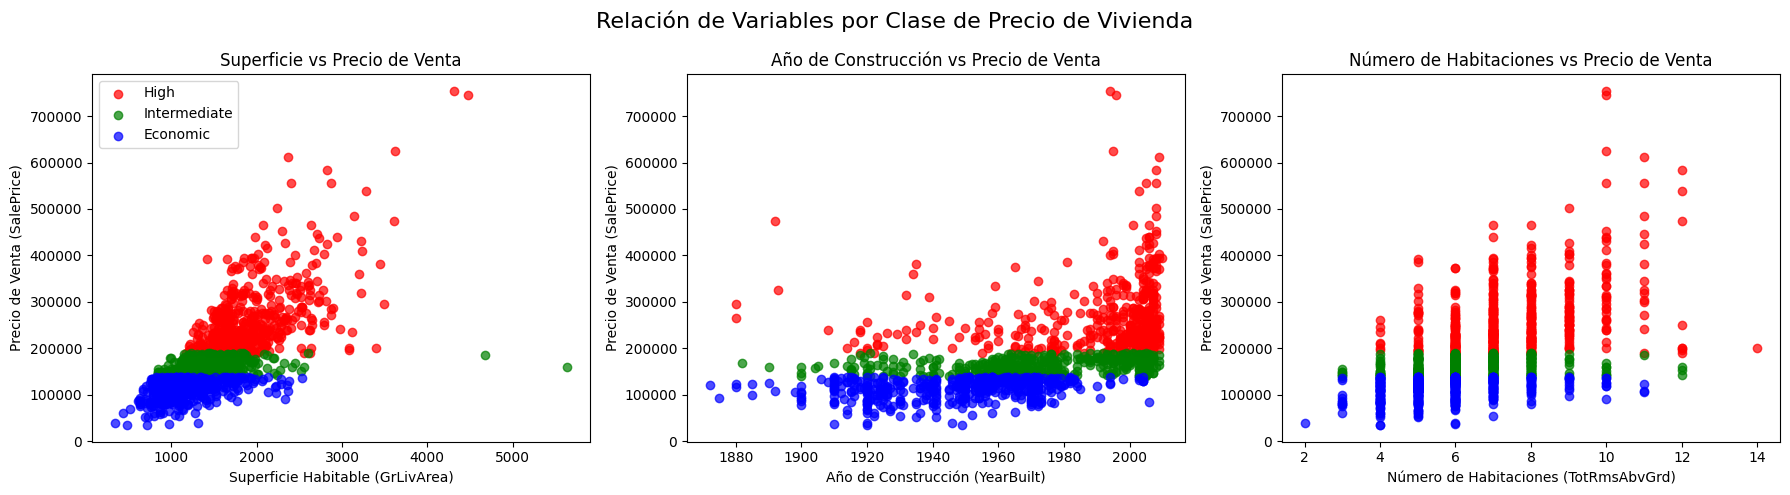

In [48]:
df_train = pd.read_csv("train.csv")
df_numerico = df_train.select_dtypes(include=['number'])
df_numerico.dropna(inplace=True)

low = df_train['SalePrice'].quantile(0.33)
medium = df_train['SalePrice'].quantile(0.66)
high = df_train['SalePrice'].max()

df_train['SalePrice_Class'] = pd.cut(df_train['SalePrice'], bins=[0, low, medium, high], labels=['Economic', 'Intermediate', 'High'])

# Asignar colores a cada clase de precio
price_colors = {
    'Economic': 'blue',
    'Intermediate': 'green',
    'High': 'red'
}

# Crear figura y subgráficos
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relación de Variables por Clase de Precio de Vivienda', fontsize=16)

# Gráfico 1: Superficie vs Precio de Venta
for price_class in df_train['SalePrice_Class'].unique():
    subset = df_train[df_train['SalePrice_Class'] == price_class]
    axs[0].scatter(subset['GrLivArea'], subset['SalePrice'],
    label=price_class, color=price_colors[price_class], alpha=0.7)
axs[0].set_xlabel('Superficie Habitable (GrLivArea)')
axs[0].set_ylabel('Precio de Venta (SalePrice)')
axs[0].set_title('Superficie vs Precio de Venta')
axs[0].legend()

# Gráfico 2: Año de Construcción vs Precio de Venta
for price_class in df_train['SalePrice_Class'].unique():
    subset = df_train[df_train['SalePrice_Class'] == price_class]
    axs[1].scatter(subset['YearBuilt'], subset['SalePrice'],
    label=price_class, color=price_colors[price_class], alpha=0.7)
axs[1].set_xlabel('Año de Construcción (YearBuilt)')
axs[1].set_ylabel('Precio de Venta (SalePrice)')
axs[1].set_title('Año de Construcción vs Precio de Venta')

# Gráfico 3: Número de Habitaciones vs Precio de Venta
for price_class in df_train['SalePrice_Class'].unique():
    subset = df_train[df_train['SalePrice_Class'] == price_class]
    axs[2].scatter(subset['TotRmsAbvGrd'], subset['SalePrice'],
    label=price_class, color=price_colors[price_class], alpha=0.7)
axs[2].set_xlabel('Número de Habitaciones (TotRmsAbvGrd)')
axs[2].set_ylabel('Precio de Venta (SalePrice)')
axs[2].set_title('Número de Habitaciones vs Precio de Venta')

plt.tight_layout()
plt.show()


C:\Users\Francis\AppData\Local\Temp\ipykernel_31000\986604807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sb.boxplot(x = 'SalePrice_Class',


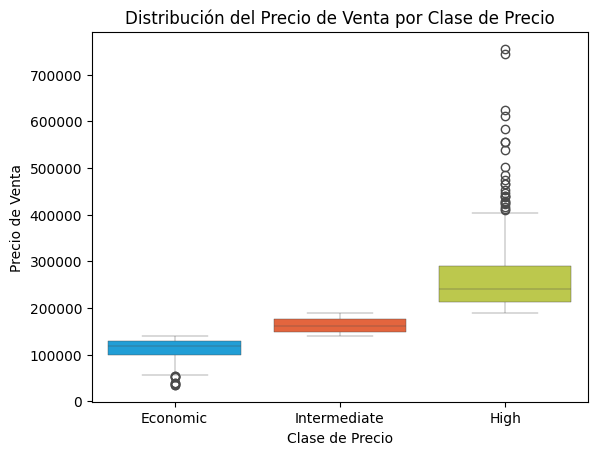

In [49]:
import seaborn as sb

g = sb.boxplot(x = 'SalePrice_Class',
            y ='SalePrice',
            data = df_train,
            palette=['#03A9F4','#FF5722','#CDDC39'],
            linewidth=0.3)
g.set_xlabel('Clase de Precio')
g.set_ylabel('Precio de Venta')
g.set_title('Distribución del Precio de Venta por Clase de Precio')
plt.show()

#### transformación de datos

Se preprocesan las variables numéricas de forma diferente a las variables categóricas, las numéricas las vamos a codificar y las numpericas a normalizar.

In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

variables_categoricas = df_train.select_dtypes(include=[object]).columns.tolist()
print("Variables categóricas:", variables_categoricas)

numeric_preprocessor = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

# Se preparan los preprocesadores
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")

#Se transforman las colunas usando los preprocesadores
from sklearn.compose import ColumnTransformer

preprocesador = ColumnTransformer([
    ('one_hot_encoder',categorical_preprocessor,variables_categoricas),
    ('numerico', numeric_preprocessor,variables_numericas)
],remainder="passthrough")

Variables categóricas: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


### 3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media o cara

In [51]:
#arriba en la parte 1, ya esta y = df_train['SalePrice']
print("Shape of y:", y.shape)


Shape of y: (1121,)


### 4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el modelo de forma automática siempre que explique los resultados 

In [52]:
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay



# Escalar los datos
scaler = StandardScaler()

# 4. Definir grid de parámetros individuales
parametros_modelos = {
    'SVC Lineal': {
        'svc__kernel': ['linear'],
        'svc__C': [0.01, 0.1, 1, 5, 16, 32]
    },
    'SVC RBF': {
        'svc__kernel': ['rbf'],
        'svc__C': [0.01, 0.1, 1, 5, 16, 32],
        'svc__gamma': ['scale', 'auto']
    },
    'SVC Polinomial': {
        'svc__kernel': ['poly'],
        'svc__C': [0.01, 0.1, 1, 5, 16, 32],
        'svc__gamma': ['scale', 'auto'],
        'svc__degree': [2, 3, 4]
    }
}



### 5. Use los modelos para predecir el valor de la variable respuesta 
### 6. Haga las matrices de confusión respectivas. 



==== Entrenando: SVC Lineal ====
Mejores parámetros para SVC Lineal: {'svc__C': 0.01, 'svc__kernel': 'linear'}
Accuracy en entrenamiento para SVC Lineal: 0.8493303571428571
Accuracy en prueba para SVC Lineal: 0.7689
Classification Report para SVC Lineal:
               precision    recall  f1-score   support

    Economic       0.73      0.86      0.79        56
        High       0.87      0.83      0.85        89
Intermediate       0.69      0.64      0.66        80

    accuracy                           0.77       225
   macro avg       0.76      0.78      0.77       225
weighted avg       0.77      0.77      0.77       225

Tiempo de entrenamiento y validación para SVC Lineal: 16.95 segundos


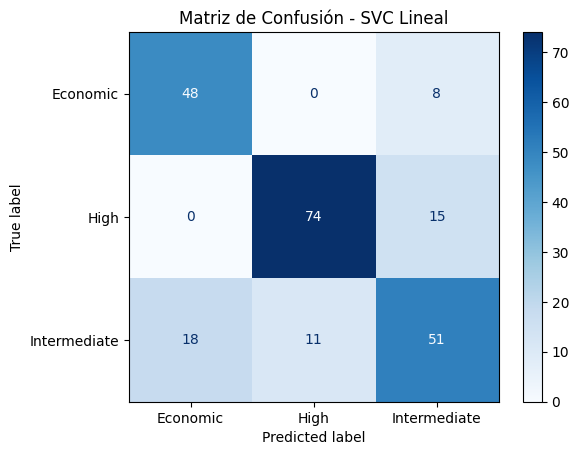



==== Entrenando: SVC RBF ====
Mejores parámetros para SVC RBF: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Accuracy en entrenamiento para SVC RBF: 0.9319196428571429
Accuracy en prueba para SVC RBF: 0.7822
Classification Report para SVC RBF:
               precision    recall  f1-score   support

    Economic       0.77      0.82      0.79        56
        High       0.88      0.83      0.86        89
Intermediate       0.69      0.70      0.70        80

    accuracy                           0.78       225
   macro avg       0.78      0.78      0.78       225
weighted avg       0.79      0.78      0.78       225

Tiempo de entrenamiento y validación para SVC RBF: 4.32 segundos


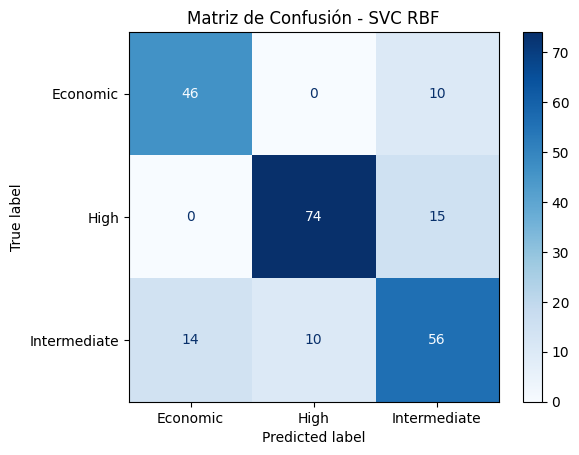



==== Entrenando: SVC Polinomial ====
Mejores parámetros para SVC Polinomial: {'svc__C': 5, 'svc__degree': 3, 'svc__gamma': 'scale', 'svc__kernel': 'poly'}
Accuracy en entrenamiento para SVC Polinomial: 0.96875
Accuracy en prueba para SVC Polinomial: 0.7644
Classification Report para SVC Polinomial:
               precision    recall  f1-score   support

    Economic       0.77      0.73      0.75        56
        High       0.90      0.79      0.84        89
Intermediate       0.65      0.76      0.70        80

    accuracy                           0.76       225
   macro avg       0.77      0.76      0.76       225
weighted avg       0.78      0.76      0.77       225

Tiempo de entrenamiento y validación para SVC Polinomial: 9.65 segundos


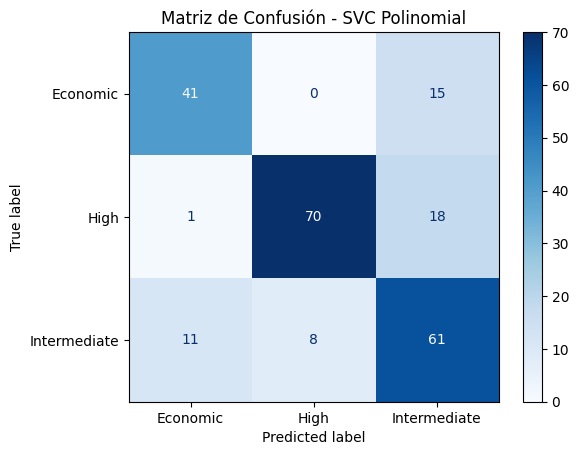

In [53]:
import time

# 5. Entrenar GridSearchCV para cada modelo
for nombre_modelo, param_grid in parametros_modelos.items():
    print(f"\n\n==== Entrenando: {nombre_modelo} ====")
    
    pipeline = Pipeline([
        ('scaler', scaler),
        ('svc', SVC())
    ])
    
    # Medir tiempo de inicio
    start_time = time.time()
    
    grid_search = GridSearchCV(pipeline, [param_grid], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Medir tiempo de fin
    end_time = time.time()
    elapsed_time = end_time - start_time

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Mejores parámetros para {nombre_modelo}:", best_params)
    
    # Accuracy en entrenamiento
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Accuracy en entrenamiento para {nombre_modelo}:", train_accuracy)

    # Accuracy en prueba
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy en prueba para {nombre_modelo}: {test_accuracy:.4f}")

    # Reporte de clasificación
    print(f"Classification Report para {nombre_modelo}:\n", classification_report(y_test, y_pred))

    # Tiempo de procesamiento
    print(f"Tiempo de entrenamiento y validación para {nombre_modelo}: {elapsed_time:.2f} segundos")
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=best_model.named_steps['svc'].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.named_steps['svc'].classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()


### 7. Analice si los modelos están sobreajustados o desajustados. ¿Qué puede hacer para manejar el sobreajuste o desajuste? 

En el primer modelo que es SVC Lineal, tiene un accuracy de 84.93% en entrenamiento y 76.89% en prueba, entonces al ver la diferencia parece que no hay un sobreajuste muy grave.

En el segundo modelo que es el de RBF, tiene un accuracy de 93.19% en entrenamiento y  78.22% en prueba, en este si se puede ver algo de sobreajuste, sin embargo se puede decir que se adapta bien al entrenamiento pero tiene dificultad con datos nuevos.

Y en el tercer modelo que es el de SVC polinomial, tiene un accuracy de 96.87% en entrenamiento y 76.44% en prueba, tiene una diferencia de 20% en este hay sobreajuste.

Para manejar el sobreajuste se puede reducir la complejidad del modelo polinomial, aumentar el parametro C de SVM, que es regularizacion.


### 8. Compare los resultados obtenidos con los diferentes modelos que hizo en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el algoritmo se equivoco más, donde se equivocó menos y la importancia que tienen los errores).

SVC RBF es el modelo más efectivo con un 78.22% de precisión en prueba, también es el más rápido (4.10 segundos).

SVC Lineal queda muy cerca con 76.89%, aunque toma casi el triple de tiempo que el RBF.

SVC Polinomial es el de menor desempeño en prueba (76.44%), además sufre de mayor sobreajuste (accuracy de 96% en entrenamiento vs 76% en prueba). El SVC Lineal y SVC Polinomial son bastante más lentos (11.29 s y 9.78 s respectivamente).

De los tres modelos evaluados, el SVC con kernel RBF fue el más efectivo, logrando la mayor precisión en prueba (78.22%) y el menor tiempo de procesamiento (4.10 segundos), además de mantener un balance aceptable entre las clases, especialmente en la categoría "High". Aunque el modelo lineal tuvo un desempeño similar en precisión (76.89%), fue mucho más lento, y el polinomial, a pesar de su alto desempeño en entrenamiento, mostró un sobreajuste considerable y un menor rendimiento en prueba (76.44%). Todos los modelos presentaron mayores dificultades para clasificar correctamente la clase "Intermediate", indicando un área de mejora para futuros trabajos.

### 9. Compare la eficiencia del mejor modelo de SVM con los resultados obtenidos en los algoritmos de las hojas de trabajo anteriores que usen la misma variable respuesta (árbol de decisión y random forest, naive bayes, KNN, regresión logística). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()

models = []

# SVM Linear
pipeline_svm = Pipeline([
    ('scaler', scaler),
    ('svc', svm.SVC(kernel='rbf'))
])

param_grid_svm = {
    'svc__C': [0.01, 0.1, 1, 10]
}

grid_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
ypred_svm = grid_svm.predict(X_test)
models.append((grid_svm, ypred_svm, "SVM Linear"))

# 1. Naive Bayes
pipeline_nb = Pipeline([
    ('scaler', scaler),
    ('nb', GaussianNB())
])

param_grid_nb = {
    'nb__var_smoothing': [0.01, 0.05, 0.065, 0.1]
}

grid_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='accuracy')
grid_nb.fit(X_train, y_train)
ypred_nb = grid_nb.predict(X_test)
models.append((grid_nb, ypred_nb, "Naive Bayes"))

# 2. Decision Tree
pipeline_dt = Pipeline([
    ('scaler', scaler),
    ('dt', DecisionTreeClassifier())
])

param_grid_dt = {
    'dt__max_depth': [3, 4, 5, 6],
    'dt__criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
ypred_dt = grid_dt.predict(X_test)
models.append((grid_dt, ypred_dt, "Decision Tree"))

# 3. Random Forest
pipeline_rf = Pipeline([
    ('scaler', scaler),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'rf__n_estimators': [50, 100],
    'rf__max_depth': [None, 5, 10],
    'rf__criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
ypred_rf = grid_rf.predict(X_test)
models.append((grid_rf, ypred_rf, "Random Forest"))

# 4. KNN
pipeline_knn = Pipeline([
    ('scaler', scaler),
    ('knn', KNeighborsClassifier())
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__p': [1, 2],
    'knn__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
ypred_knn = grid_knn.predict(X_test)
models.append((grid_knn, ypred_knn, "KNN"))

# 5. Logistic Regression
pipeline_lr = Pipeline([
    ('scaler', scaler),
    ('lr', LogisticRegression(solver='newton-cg'))
])

param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1],
    'lr__penalty': ['l2']
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
ypred_lr = grid_lr.predict(X_test)
models.append((grid_lr, ypred_lr, "Logistic Regression"))

# Evaluar todos los modelos
for model, ypred, name in models:
    print(f"\nModel: {name}")
    print(f"Best Params: {model.best_params_}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, ypred))
    print("\nClassification Report:")
    print(classification_report(y_test, ypred))


**Random Forest**: Mejor balance entre las 3 clases. Menos errores graves.

**Logistic Regression**: Muy bueno para "High" y sólido en "Economic".

**SVM**: Buenísima precisión en "High", pero sufre en "Intermediate".

**KNN**: Aguanta bastante bien si quieres un modelo más interpretable.

**Naive Bayes**: Sorprendentemente bien en "Economic" pero baja en "Intermediate".

**Decision Tree**: Tiende a sobreajustar o no generalizar bien aquí.

In [ ]:
import time
from memory_profiler import memory_usage

def time_and_memory(model, X_train, y_train, X_test, model_name):
    start_time = time.time()
    mem_usage = memory_usage((model.fit, (X_train, y_train)))
    end_time = time.time()
    
    print(f"Model: {model_name}")
    print(f"Training Time: {end_time - start_time:.2f} seconds")
  

for m in models:
    time_and_memory(m[0], X_train, y_train, X_test, m[2])
    print("\n")

Model: SVM Linear
Training Time: 4.48 seconds


Model: Naive Bayes
Training Time: 1.92 seconds


Model: Decision Tree
Training Time: 2.55 seconds


Model: Random Forest
Training Time: 22.95 seconds


Model: KNN
Training Time: 3.66 seconds


Model: Logistic Regression
Training Time: 2.44 seconds




El que menos tiempo tomó fue Naive Bayes, mientras el que más se tardó fue random forest. 

### 10. Genere un buen modelo de regresión, use para esto la variable del precio de la casadirectamente. Tunee el modelo.

Shape of X: (1121, 37)
Shape of y: (1121,)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=linear; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=0.1, svr__degree=2, svr__epsilon=0.01, svr__

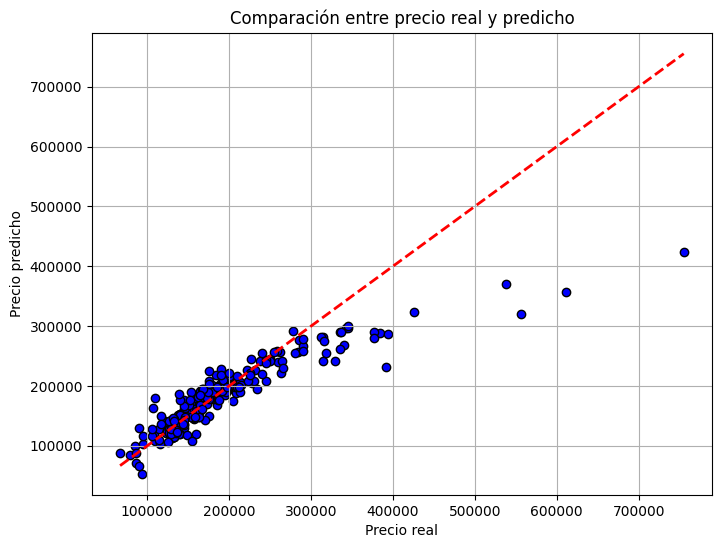

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

df_train = df_train.loc[df_numerico.index]
X = df_numerico[variables_numericas].drop(columns=['SalePrice', 'SalePrice_Class', ''], errors='ignore')
y = df_train['SalePrice']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR())
])

# Definir el grid de parámetros
param_grid = {
    'svr__C': [0.1, 1, 10, 100],
    'svr__epsilon': [0.01, 0.1, 0.5],
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__degree': [2, 3, 4]  # solo relevante si kernel=poly
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)  # Asegúrate que y_train ahora es el precio real

best_model = grid_search.best_estimator_
print("Mejores parámetros encontrados:", grid_search.best_params_)

#  Evaluar el modelo
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_train_pred)):.2f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.2f}")
print(f"Test R^2: {r2_score(y_test, y_test_pred):.4f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Comparación entre precio real y predicho')
plt.grid(True)
plt.show()


### 11. Compare los resultados del modelo de regresión generado con los de hojas anteriores que utilicen la misma variable, como la de regresión lineal, el árbol de regresión, naive bayes, KNN


El **SVR** es ideal cuando se manejan datos complejos con relaciones no lineales. Su **R²** suele ser alto cuando los parámetros son bien ajustados, aunque el tiempo de entrenamiento tiende a ser más largo que el de otros modelos.

La **Regresión Lineal** es rápida y fácil de implementar, pero su rendimiento es limitado si los datos tienen relaciones no lineales, lo que se refleja en un **R²** bajo.

El **Árbol de Decisión** es eficaz para capturar relaciones no lineales, aunque puede sobreajustarse si los parámetros, como la profundidad máxima, no se ajustan correctamente.

**Naive Bayes** no es adecuado para tareas de regresión, por lo que sus resultados no son confiables en este contexto.

**KNN** es una opción adecuada para datos no lineales, pero depende significativamente del valor de `k` y es sensible a la escala de los datos.

En términos generales, el **SVR** es probablemente el modelo más preciso cuando los datos tienen relaciones no lineales. Sin embargo, modelos más sencillos como **Regresión Lineal** y **Árbol de Decisión** podrían ser preferibles si el tiempo de entrenamiento es más crítico que la precisión.

### 12. Genere un informe de los resultados y las explicaciones.

El **SVR** es un modelo altamente eficaz cuando se trabaja con datos complejos que presentan relaciones no lineales. Este modelo puede alcanzar un **R²** alto si se ajustan correctamente los parámetros, lo que refleja su capacidad para capturar patrones complejos. Sin embargo, uno de sus inconvenientes es el tiempo de entrenamiento, que suele ser más largo en comparación con otros modelos debido a la complejidad del ajuste y la optimización de los parámetros, especialmente cuando se utiliza el kernel RBF o polinómico.

La **Regresión Lineal** es un modelo simple y rápido de implementar. Sin embargo, cuando los datos no siguen una distribución lineal, su rendimiento se ve afectado negativamente, lo que se refleja en un **R²** bajo. La velocidad de entrenamiento es su principal ventaja, pero su aplicabilidad está limitada a datos con relaciones lineales claras, lo que lo hace menos adecuado para tareas con complejidad no lineal.

El **Árbol de Decisión para Regresión** es una opción robusta para modelar relaciones no lineales. Este modelo tiene la ventaja de ser fácilmente interpretable y de adaptarse bien a datos complejos. No obstante, puede sobreajustarse si no se ajustan adecuadamente sus parámetros, como la profundidad del árbol, lo que puede afectar negativamente su rendimiento en datos nuevos. A pesar de este riesgo, su **R²** suele ser alto cuando se controla el sobreajuste, y su tiempo de entrenamiento es relativamente rápido.

**Naive Bayes**, aunque es un modelo eficiente y rápido, no es adecuado para tareas de regresión. Este modelo se utiliza comúnmente para clasificación y no maneja bien la predicción de valores continuos. En el contexto de regresión, los resultados de **Naive Bayes** son poco confiables y, por lo tanto, no se recomienda para este tipo de tareas.

Finalmente, **KNN (K-Nearest Neighbors)** es una opción adecuada cuando se trabaja con datos no lineales, ya que no hace suposiciones sobre la distribución de los datos. Sin embargo, su rendimiento depende en gran medida de la elección del parámetro `k` y de la escala de los datos. Si no se ajustan adecuadamente estos parámetros, su precisión puede verse afectada. Aunque el tiempo de entrenamiento es rápido, el tiempo de predicción puede ser más largo, especialmente en grandes volúmenes de datos.

CONCLUSION 

El **SVR** es probablemente el modelo más preciso cuando se manejan relaciones no lineales en los datos, pero a costa de un mayor tiempo de entrenamiento. Por otro lado, modelos más sencillos como la **Regresión Lineal** y el **Árbol de Decisión** pueden ser más adecuados si el tiempo de entrenamiento es un factor crítico y la precisión no es tan determinante.